In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv("C:\\Users\\Usman\Desktop\\Insurance Classificaiton Project\\Insurance\\train.csv")
test_data = pd.read_csv("C:\\Users\\Usman\Desktop\\Insurance Classificaiton Project\\Insurance\\test.csv")

# Display the first few rows of the train dataset
train_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [2]:
# Display the summary statistics of the train dataset
train_data.describe(include='all')

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,...,2,2,2,2,2,2,2,2,NaN,NaN
top,ID00001,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


In [3]:
# Check for duplicate rows
duplicate_rows = train_data.duplicated()
print(f'Number of duplicate rows: {duplicate_rows.sum()}')

# If there are duplicates, we will drop them
if duplicate_rows.sum() > 0:
    train_data = train_data.drop_duplicates()
    print('Dropped duplicate rows.')

# Check for missing values
missing_values = train_data.isnull().sum()
print(f'Number of missing values:\n{missing_values[missing_values > 0]}')

# If there are missing values, we will fill them with the median of the column
if missing_values.sum() > 0:
    train_data = train_data.fillna(train_data.median())
    print('Filled missing values with median.')

Number of duplicate rows: 0
Number of missing values:
Series([], dtype: int64)


In [5]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(train_data.select_dtypes(include=[np.number]))

# Get absolute Z-scores greater than 3
outliers = (np.abs(z_scores) > 3)

# If there are outliers, we will remove them
if outliers.any(axis=None): # axis=None checks the entire DataFrame, not just along one axis
    train_data = train_data[~(outliers.any(axis=1))]  # The "~" operator inverts the boolean mask
    print('Removed outliers.')
else:
    print('No outliers detected.')


Removed outliers.


# Exploratory Data Analysis

In [7]:
# Univariate analysis
for column in train_data.columns:
    if train_data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(6, 4))
        train_data[column].hist()
        plt.title(column)
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        train_data[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()

KeyboardInterrupt: 

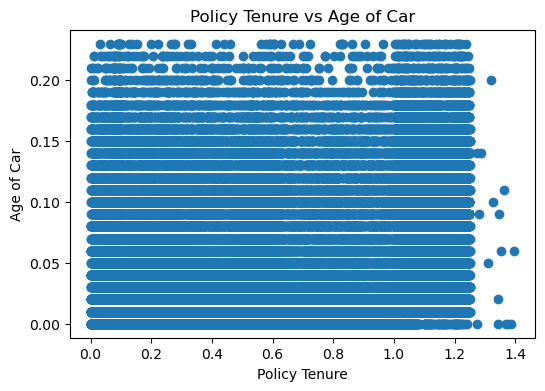

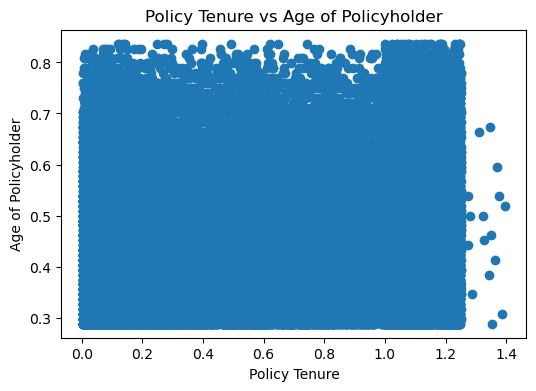

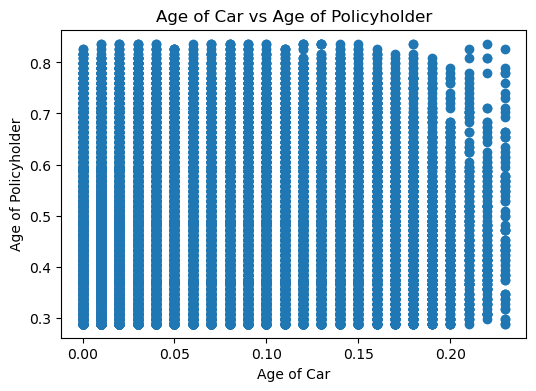

In [6]:
# Bivariate analysis - Scatter plots for continuous-continuous pairs
plt.figure(figsize=(6, 4))
plt.scatter(train_data['policy_tenure'], train_data['age_of_car'])
plt.xlabel('Policy Tenure')
plt.ylabel('Age of Car')
plt.title('Policy Tenure vs Age of Car')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(train_data['policy_tenure'], train_data['age_of_policyholder'])
plt.xlabel('Policy Tenure')
plt.ylabel('Age of Policyholder')
plt.title('Policy Tenure vs Age of Policyholder')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(train_data['age_of_car'], train_data['age_of_policyholder'])
plt.xlabel('Age of Car')
plt.ylabel('Age of Policyholder')
plt.title('Age of Car vs Age of Policyholder')
plt.show()

C:\Users\Usman\AppData\Local\Temp\ipykernel_34916\4109998823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


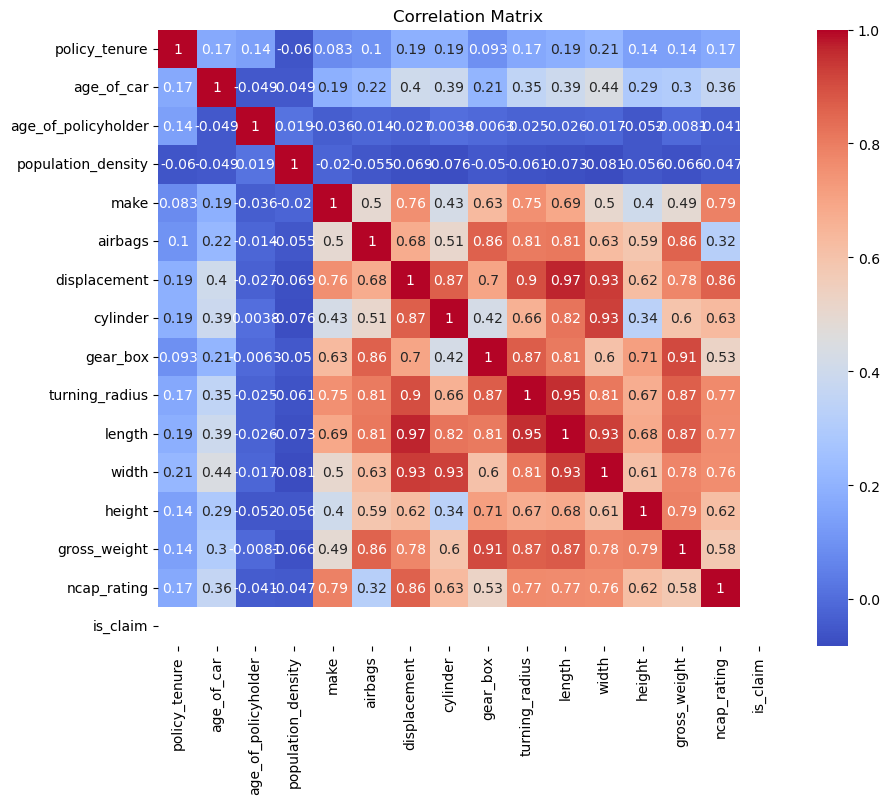

In [8]:
# Multivariate analysis - Correlation matrix for continuous variables
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Check the columns in the dataset
train_data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [10]:
# Check the balance of the 'is_claim' variable
claim_counts = train_data['is_claim'].value_counts()
claim_counts

0    50359
Name: is_claim, dtype: int64

In [12]:
# Separate majority and minority classes
df_majority = train_data[train_data.is_claim==0]
df_minority = train_data[train_data.is_claim==1]

# Check if df_minority is not empty
if not df_minority.empty:

    # Upsample minority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=42) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    # Display new class counts
    print(df_upsampled.is_claim.value_counts())
else:
    print("No minority cases found in the data!")

No minority cases found in the data!


NameError: name 'annot_percent' is not defined

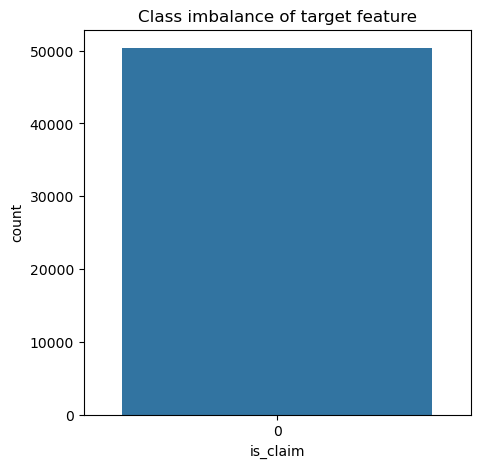

In [14]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=train_data['is_claim'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to categorical variables
for column in df_upsampled.columns:
    if df_upsampled[column].dtype == 'object':
        df_upsampled[column] = le.fit_transform(df_upsampled[column])

# Separate input features and target variable
X = df_upsampled.drop('is_claim', axis=1)
y = df_upsampled['is_claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to categorical variables
for column in df_upsampled.columns:
    if df_upsampled[column].dtype == 'object':
        df_upsampled[column] = le.fit_transform(df_upsampled[column])

# Separate input features and target variable
X = df_upsampled.drop('is_claim', axis=1)
y = df_upsampled['is_claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))